In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020-Mens-Data/MEvents2016.csv
/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020-Mens-Data/MEvents2018.csv
/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020-Mens-Data/MEvents2015.csv
/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020-Mens-Data/MEvents2019.csv
/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020-Mens-Data/MEvents2017.csv
/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020-Mens-Data/MPlayers.csv
/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/Cities.csv
/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MTeamCoaches.csv
/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MTeamSpellings.csv
/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020-Mens-Data/MDataFiles_Stage1/MMasseyOrdinals.csv
/kaggle/input/march-madness-analytics-2020/2020D

In [2]:
import sqlite3
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.set_option('max_columns', 180)
pd.set_option('display.max_rows', 200000)
pd.set_option('max_colwidth', 5000)

In [3]:
MENS_DIR = '/kaggle/input/march-madness-analytics-2020/2020DataFiles/2020-Mens-Data/'

In [4]:
MEvents2015 = pd.read_csv(f'{MENS_DIR}MEvents2015.csv')
MEvents2016 = pd.read_csv(f'{MENS_DIR}MEvents2016.csv')
MEvents2017 = pd.read_csv(f'{MENS_DIR}MEvents2017.csv')
MEvents2018 = pd.read_csv(f'{MENS_DIR}MEvents2018.csv')
MEvents2019 = pd.read_csv(f'{MENS_DIR}MEvents2019.csv')
MPlayers = pd.read_csv(f'{MENS_DIR}MPlayers.csv')
cities = pd.read_csv(f'{MENS_DIR}MDataFiles_Stage1/Cities.csv')
conferences = pd.read_csv(f'{MENS_DIR}MDataFiles_Stage1/Conferences.csv')

In [5]:
MSecondaryTourneyCompactResults = pd.read_csv(f'{MENS_DIR}MDataFiles_Stage1/MSecondaryTourneyCompactResults.csv')
MTeamConferences = pd.read_csv(f'{MENS_DIR}MDataFiles_Stage1/MTeamConferences.csv')
MNCAATourneyDetailedResults = pd.read_csv(f'{MENS_DIR}MDataFiles_Stage1/MNCAATourneyDetailedResults.csv')
MNCAATourneySeeds = pd.read_csv(f'{MENS_DIR}MDataFiles_Stage1/MNCAATourneySeeds.csv')
MConferenceTourneyGames = pd.read_csv(f'{MENS_DIR}MDataFiles_Stage1/MConferenceTourneyGames.csv')
MNCAATourneyCompactResults = pd.read_csv(f'{MENS_DIR}MDataFiles_Stage1/MNCAATourneyCompactResults.csv')
MGameCities = pd.read_csv(f'{MENS_DIR}MDataFiles_Stage1/MGameCities.csv')
MTeamCoaches = pd.read_csv(f'{MENS_DIR}MDataFiles_Stage1/MTeamCoaches.csv')
MSeasons = pd.read_csv(f'{MENS_DIR}MDataFiles_Stage1/MSeasons.csv')
MRegularSeasonCompactResults = pd.read_csv(f'{MENS_DIR}MDataFiles_Stage1/MRegularSeasonCompactResults.csv')
MNCAATourneySlots = pd.read_csv(f'{MENS_DIR}MDataFiles_Stage1/MNCAATourneySlots.csv')
MTeams = pd.read_csv(f'{MENS_DIR}MDataFiles_Stage1/MTeams.csv')
MNCAATourneySeedRoundSlots = pd.read_csv(f'{MENS_DIR}MDataFiles_Stage1/MNCAATourneySeedRoundSlots.csv')
MSecondaryTourneyTeams = pd.read_csv(f'{MENS_DIR}MDataFiles_Stage1/MSecondaryTourneyTeams.csv')
MMasseyOrdinals = pd.read_csv(f'{MENS_DIR}MDataFiles_Stage1/MMasseyOrdinals.csv')

In [6]:
try:
    MTeamSpellings = pd.read_csv(f'{MENS_DIR}MDataFiles_Stage1/MTeamSpellings.csv',  error_bad_lines=False)
except UnicodeDecodeError:
    MTeamSpellings = pd.read_csv(f'{MENS_DIR}MDataFiles_Stage1/MTeamSpellings.csv', error_bad_lines=False,encoding="cp1252")
try:
    MRegularSeasonDetailedResults = pd.read_csv(f'{MENS_DIR}MDataFiles_Stage1/MRegularSeasonDetailedResults.csv',  error_bad_lines=False)
except UnicodeDecodeError:
    MRegularSeasonDetailedResults = pd.read_csv(f'{MENS_DIR}MDataFiles_Stage1/MRegularSeasonDetailedResults.csv', error_bad_lines=False,encoding="cp1252")


First - breakdown the data initially according to the description in the Kaggle data set.<br>
**Section 1 -  Basics**<br>
* Team ID's and Team Names<br>
* Historical tournament seeds<br>
* Final scores of historical regular season, conference tournament, and NCAA® tournament games<br>
* Season-level details including dates and region names<br><br>
MTeams.csv, MSeasons.csv, MNCAATourneySeeds.csv, MRegularSeasonCompactResults.csv, MNCAATourneyCompactResults.csv

# Tournament Data
NCAA Tournament wins and losses since 1985.  Here we have a high level overview of NCAA Tournament data dating back to 1985 to 2019 season.  We look at total championship games won and lost and championship winners and runners-up by team.


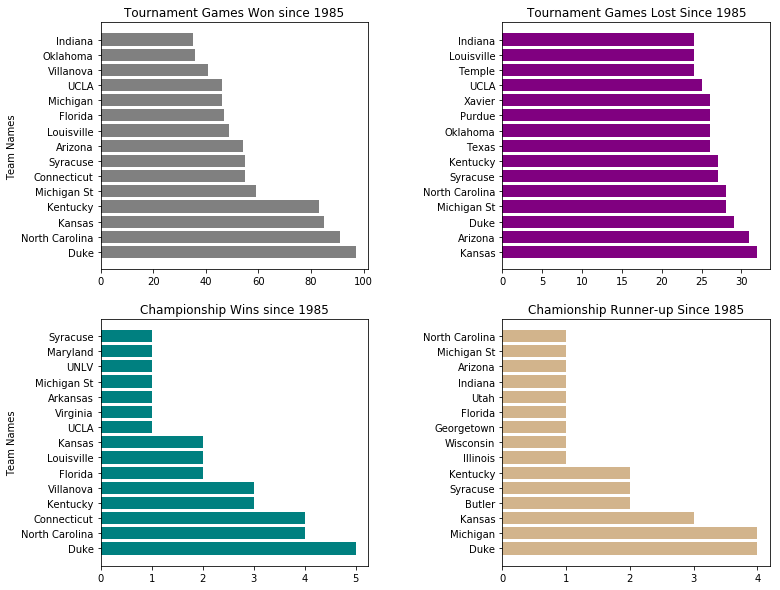

In [7]:
#Create plots for Tournament wins and losses (runner-up) since 1985

fig = plt.figure(figsize=(12,10))
#Games won since 1985
#total wins in all tournament games
wteam = MNCAATourneyCompactResults.rename(columns = {'WTeamID':'TeamID'})
winning_team = wteam.merge(MTeams, on = 'TeamID')
df=pd.DataFrame(winning_team['TeamName'].value_counts().head(15).reset_index())
df=df.rename(columns={'index':'TeamName', 'TeamName':'Wins'})
ax = fig.add_subplot(2,2,1)
ax.barh(y=df['TeamName'],width=df.Wins, color='grey')
ax.set_title("Tournament Games Won since 1985")
ax.set_ylabel('Team Names')
#winners of tournament, day #154
df=pd.DataFrame(winning_team[winning_team.DayNum==154]['TeamName'].value_counts().head(15).reset_index())
df=df.rename(columns={'index':'TeamName', 'TeamName':'Wins'})
ax = fig.add_subplot(2,2,3)
ax.barh(y=df['TeamName'],width=df.Wins, color='teal')
ax.set_title("Championship Wins since 1985")
ax.set_ylabel('Team Names')

#Games lost since 1985
lteam = MNCAATourneyCompactResults.rename(columns = {'LTeamID':'TeamID'})
losing_team = lteam.merge(MTeams, on = 'TeamID')
#total losses in all tournament games
dfl=pd.DataFrame(losing_team['TeamName'].value_counts().head(15).reset_index())
dfl=dfl.rename(columns={'index':'TeamName', 'TeamName':'Losses'})
ax = fig.add_subplot(2,2,2)
ax.barh(y=dfl['TeamName'],width=dfl.Losses, color='purple')
ax.set_title("Tournament Games Lost Since 1985")
#Runners up of tournamnet since 1985
dfl=pd.DataFrame(losing_team[losing_team.DayNum==154]['TeamName'].value_counts().head(15).reset_index())
dfl=dfl.rename(columns={'index':'TeamName', 'TeamName':'Losses'})
ax = fig.add_subplot(2,2,4)
ax.barh(y=dfl['TeamName'],width=dfl.Losses, color='tan')
ax.set_title("Chamionship Runner-up Since 1985")

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.2)
plt.show()



Duke has the won the most tournament games with 97 wins and Duke has won the most NCAA Championship games with five wins.  Duke was also the NCAA Championship runner up 4 times.  North Carolina and Connecticut have both won four championships yet neither of them have been NCAA Championship runner up.

#### Championship Wins by Seed

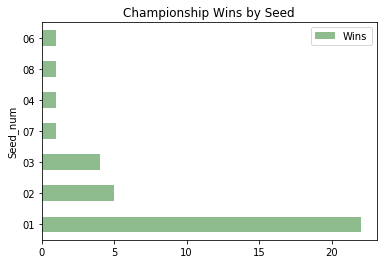

In [8]:
#Creating plot to show number of Championship wins by seed
wteam = MNCAATourneyCompactResults.rename(columns = {'WTeamID':'TeamID'})
seed_wins=wteam.merge(MNCAATourneySeeds, on=('TeamID','Season'))
seed_wins.loc[:,('Seed_num')]=seed_wins.loc[:,('Seed')].str[1:]
df=pd.DataFrame(seed_wins[seed_wins.DayNum==154]['Seed_num'].value_counts().head(15).reset_index())
df=df.rename(columns={'index':'Seed_num', 'Seed_num':'Wins'})
df.plot.barh(x='Seed_num', color='darkseagreen')
plt.title('Championship Wins by Seed')
plt.show()

As of the 2019 season, the 1st seed has won 22 of the 34 championships since 1985 followed by five wins for the 2nd seed and 4 wins by the third seed.  Seed 5 has not won any NCAA Championships in the seasons 1985 - 2019.

In [9]:
#Find first D1 season for NCAA Championship winner
winning_team['yearsD1']=winning_team['LastD1Season']-winning_team['FirstD1Season']
winning_team[winning_team.DayNum==154]['yearsD1'].value_counts()

35    35
Name: yearsD1, dtype: int64

All of the championship winners have been D1 teams since at least 1985.  The teams may have become D1 teams before then but our data set begins at 1985.

In [10]:
#not using for now
#creating df for season 2019, split seed in to region and number
data = MNCAATourneySeeds[MNCAATourneySeeds.Season==2019]
team_id=list(data.TeamID.unique())
data.loc[:,('Seed_num')]=data.loc[:,('Seed')].str[1:]
data.loc[:,('Region')]=data.loc[:,('Seed')].str[0]
region_id =list(data.Region.unique())
data=data.merge(MTeams, on='TeamID')
data.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Season,Seed,TeamID,Seed_num,Region,TeamName,FirstD1Season,LastD1Season
0,2019,W01,1181,01,W,Duke,1985,2020
1,2019,W02,1277,02,W,Michigan St,1985,2020
2,2019,W03,1261,03,W,LSU,1985,2020
3,2019,W04,1439,04,W,Virginia Tech,1985,2020
4,2019,W05,1280,05,W,Mississippi St,1985,2020


In [11]:
#not using for now
#creates table of how far team got in 2019 season
Tourn_wins = MNCAATourneyCompactResults.rename(columns = {'WTeamID':'TeamID'})
Tourn_wins=Tourn_wins[Tourn_wins.Season==2019]
data_tour_wins = Tourn_wins.merge(data, on = 'TeamID')
data_tour_wins.shape

df_w=pd.DataFrame(data_tour_wins['TeamName'].value_counts().head(15).reset_index())
df_w=df_w.rename(columns={'index':'TeamName', 'TeamName':'Wins'})


# Reagular Season Results for the 2019 Tournament Teams


In [12]:
#not using for now

#Creates a df by Season with the TeamID in the Tourney
def tourney_season(years):

#*****input is a list****

#years = [2015, 2016, 2017, 2018, 2019]
    df_by_year=[]
    for y in years:    
        key = 'df_{}'.format(y)
        value = MNCAATourneySeeds[MNCAATourneySeeds.Season==y]
        df_by_year.append(key)
        exec("{} = value".format(key))
    return df_by_year
#print('List of DataFrames by year','\n',df_by_year)

In [13]:
# not using for now
#for a single year dataframe
def tour_seas(year):
    df_by_year=[]
    #for y in years:    
    key = 'df_{}'.format(year)
    value = MNCAATourneySeeds[MNCAATourneySeeds.Season==year]
    df_by_year.append(key)
    exec("{} = value".format(key))
    return df_by_year

### Creating functions to calculate stats for the year in question.
Dividing results by region for better visualizations.  


In [14]:
#These functions pull the tournament seed, region, team name info for the year entered

#Seed column is region + seed number. Creating 2 columns to hold each value: Region & seed number
def get_region(df):
    df.loc[:,('region_code')]=df.loc[:,('Seed')].str[0]
    df.loc[:,('seed_num')]=df.loc[:,('Seed')].str[1:]
    return (df)

#creating df for single season, split seed into region and number, merge with MTeams for team names
def season_info(year):
    df_year = MNCAATourneySeeds[MNCAATourneySeeds.Season==year]
    df_reg=get_region(df_year)
    df_tourn_info=df_reg.merge(MTeams, on='TeamID')
    return df_tourn_info

In [15]:
season_info(2019).head()

,Season,Seed,TeamID,region_code,seed_num,TeamName,FirstD1Season,LastD1Season
0,2019,W01,1181,W,01,Duke,1985,2020
1,2019,W02,1277,W,02,Michigan St,1985,2020
2,2019,W03,1261,W,03,LSU,1985,2020
3,2019,W04,1439,W,04,Virginia Tech,1985,2020
4,2019,W05,1280,W,05,Mississippi St,1985,2020


In [16]:
#Create function to pull regular season scores for teams in the tournament. 
#Create df for regular season of # wins, losses, % wins for the teams in the tournament for the year entered
def get_stats(year):
    df_year=season_info(year)
    teams = df_year.TeamID.unique()
    df = MRegularSeasonCompactResults[MRegularSeasonCompactResults['Season'] == year]
    win_count=[]
    loss_count=[]
    pct_wins=[]
    df_stats=pd.DataFrame()
    for t in teams:
        w=len(df[df['WTeamID']==t])
        l=len(df[df['LTeamID']==t])
        pct = round(((w/(w+l))*100))
        win_count.append(w)
        loss_count.append(l)
        pct_wins.append(pct)
    df_stats['TeamID']=teams
    df_stats['wins']=win_count
    df_stats['losses']=loss_count
    df_stats['pct_wins']=pct_wins
    df_season_stats=df_stats.merge(df_year, on='TeamID')
    return df_season_stats
df_season_stats=get_stats(2019)

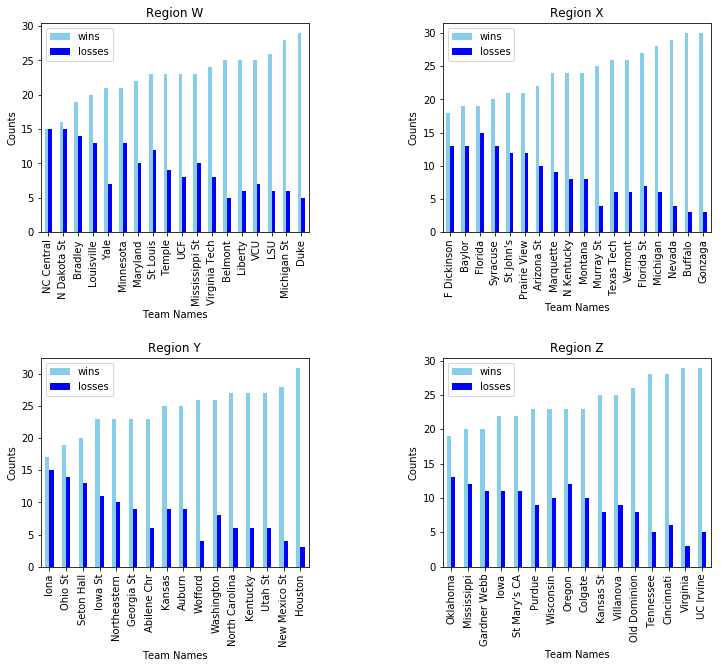

In [17]:
fig = plt.figure(figsize=(12,10))
regions=df_season_stats.region_code.unique()
for r in range(0,len(regions)):
    
   
    reg=regions[r]
    reg_df = df_season_stats[df_season_stats.region_code==reg]
    teams = reg_df.TeamID.unique()
    names = reg_df.TeamName.unique()
    reg_season_stats=pd.DataFrame({'wins':reg_df.wins,'losses':reg_df.losses,'names':names}).sort_values('wins')
    reg_season_stats.set_index('names')

    ax = fig.add_subplot(2,2,r+1)
    reg_season_stats.plot.bar(x='names',color=["SkyBlue","blue"], rot=90, title='Region {}'.format(reg),ax=ax)
    ax.set_xlabel("Team Names")
    ax.set_ylabel("Counts")
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.6)
plt.show()

In [18]:
#Create df for tournament of # wins, losses, % wins for the teams in the tournament year entered
def get_stats_t(year):
    df_year=season_info(year)
    teams = df_year.TeamID.unique()
    df = MNCAATourneyCompactResults[MNCAATourneyCompactResults['Season'] == year]
    win_count=[]
    loss_count=[]
    pct_wins=[]
    df_stats=pd.DataFrame()
    for t in teams:
        w=len(df[df['WTeamID']==t])
        l=len(df[df['LTeamID']==t])
        pct = round(((w/(w+l))*100))
        win_count.append(w)
        loss_count.append(l)
        pct_wins.append(pct)
    df_stats['TeamID']=teams
    df_stats['wins_t']=win_count
    df_stats['losses_t']=loss_count
    df_stats['pct_won_t']=pct_wins
    df_tourney_stats=df_stats.merge(df_year, on='TeamID')
    return df_tourney_stats
df_tourney_stats=get_stats_t(2019)

In [19]:
df_tourney_stats.head()

,TeamID,wins_t,losses_t,pct_won_t,Season,Seed,region_code,seed_num,TeamName,FirstD1Season,LastD1Season
0,1181,3,1,75,2019,W01,W,01,Duke,1985,2020
1,1277,4,1,80,2019,W02,W,02,Michigan St,1985,2020
2,1261,2,1,67,2019,W03,W,03,LSU,1985,2020
3,1439,2,1,67,2019,W04,W,04,Virginia Tech,1985,2020
4,1280,0,1,0,2019,W05,W,05,Mississippi St,1985,2020


In [20]:
#Create df for regular season and tournament wins, losses, % wins
df_all_stats=df_tourney_stats[['TeamID','wins_t','losses_t','pct_won_t']].merge(df_season_stats, on='TeamID')
print('Percent wins in the NCAA Tournament''\n''Where 100 indicates 6/6 wins, the tournament winner''\n'
     'These results will be used to filter out the rounds of the Tournament')
print(sorted(df_all_stats.pct_won_t.unique()))

Percent wins in the NCAA Tournament
Where 100 indicates 6/6 wins, the tournament winner
These results will be used to filter out the rounds of the Tournament
[0, 50, 67, 75, 80, 83, 100]


In [21]:
cut_points=[0.0,60.0,70.0,80.0,90.0,100.0]
cut_label=[60.0,70.0,80.0,90.0,100.0]

df_all_stats["pct_bins"] = pd.cut(df_all_stats["pct_wins"],cut_points,labels=cut_label)
df_all_stats['pct_bins']=df_all_stats['pct_bins'].astype('float64')

One would expect to see teams that performed best in the regular season to make it the furthest in the NCAA Tournament.  Below we look at percent wins for the regular season and percent wins in the tournament.  In the tournamnet, a loss means the team is out so 50% wins means they one the first round and lost the second.  A total of 6 games are played.  The season wins is not indicative of tournament performance.  There are many teams with over 80% wins in the regular season that did not make it past the first round.  The season percent wins are grouped into bins for the plot where 60% is the bin for up to 60%, 70% is 60%-70%, and so on.<br>
Below is a plot of the teams that made it past round one of tournament and their percent wins in the regular season. Then we will look at the top four teams in the tournament in each region, i.e. the teams with 3, 4, 5, and 6(1st place) wins.

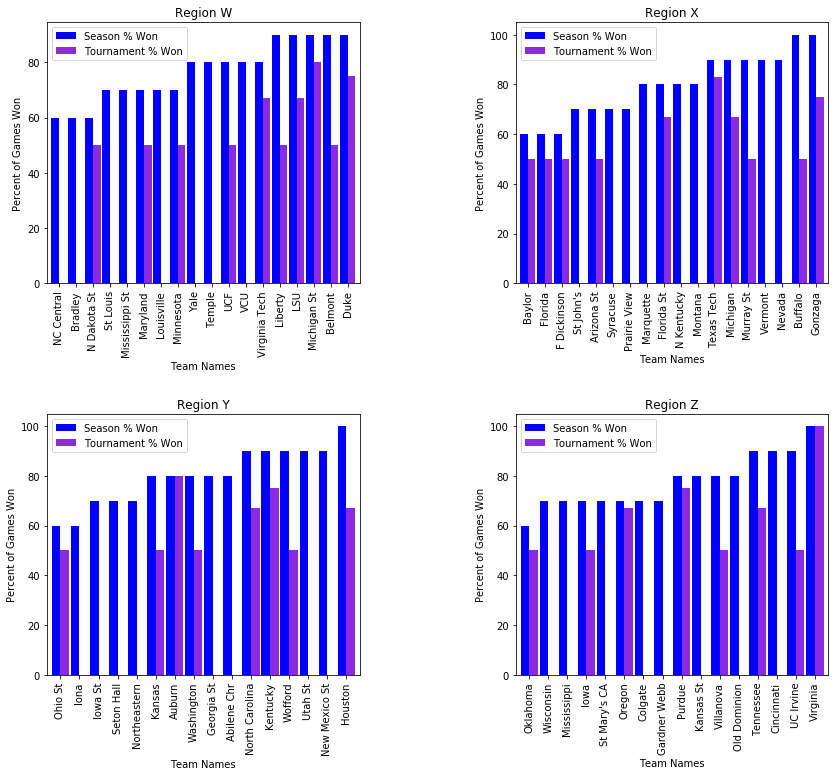

In [22]:
fig = plt.figure(figsize=(14,12))
regions=df_all_stats.region_code.unique()
for r in range(0,len(regions)):
       
    reg=regions[r]
    reg_df = df_all_stats[df_all_stats.region_code==reg]
    teams = reg_df.TeamID.unique()
    names = reg_df.TeamName.unique()
    all_stat=pd.DataFrame({'Season % Won':reg_df.pct_bins,'Tournament % Won':reg_df.pct_won_t,'names':names}).sort_values('Season % Won')
    all_stat.set_index('names')

    ax = fig.add_subplot(2,2,r+1)
    all_stat.plot.bar(x='names',color=["blue","blueviolet"],width=.9, rot=90, title='Region {}'.format(reg),ax=ax)
    ax.set_xlabel("Team Names")
    ax.set_ylabel("Percent of Games Won")
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.5)

In [23]:
#These are the sweet sixteen, the top 16 teams who won the first 2 rounds of the championship
sweet_sixteen = df_all_stats[df_all_stats.pct_won_t>=60]
print('Sweet Sixteen seed counts','\n',sweet_sixteen.seed_num.value_counts())
print('Seed 12 Team','\n',sweet_sixteen[sweet_sixteen.seed_num=='12']['TeamName'])

Sweet Sixteen seed counts 
 01    4
03    4
02    4
04    2
12    1
05    1
Name: seed_num, dtype: int64
Seed 12 Team 
 63    Oregon
Name: TeamName, dtype: object


In [24]:
sweet_sixteen.head()

,TeamID,wins_t,losses_t,pct_won_t,wins,losses,pct_wins,Season,Seed,region_code,seed_num,TeamName,FirstD1Season,LastD1Season,pct_bins
0,1181,3,1,75,29,5,85,2019,W01,W,01,Duke,1985,2020,90.0
1,1277,4,1,80,28,6,82,2019,W02,W,02,Michigan St,1985,2020,90.0
2,1261,2,1,67,26,6,81,2019,W03,W,03,LSU,1985,2020,90.0
3,1439,2,1,67,24,8,75,2019,W04,W,04,Virginia Tech,1985,2020,80.0
18,1211,3,1,75,30,3,91,2019,X01,X,01,Gonzaga,1985,2020,100.0


Of the teams in the "Sweet Sixteen" for the 2019 season, only one is not a seed 5 or higher.<br>
The number 12 seed is Oregon.<br>

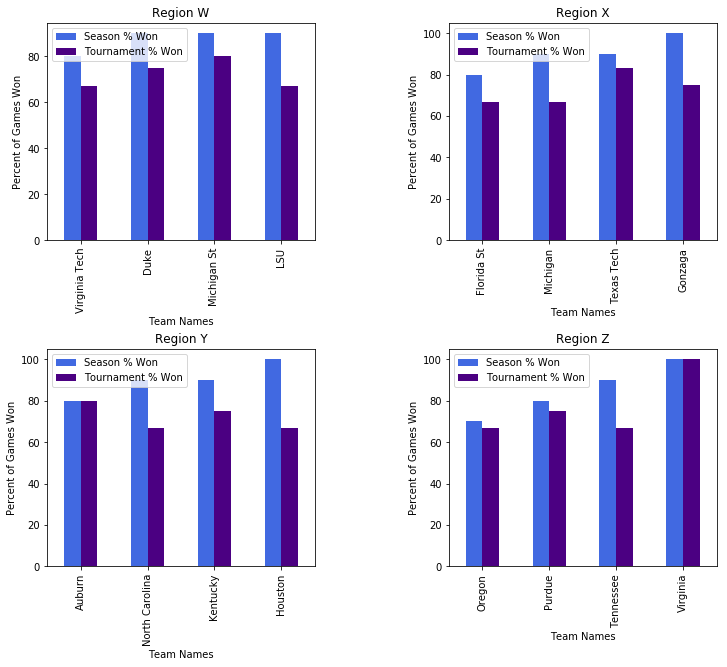

In [25]:
fig = plt.figure(figsize=(12,10))
regions=df_all_stats.region_code.unique()
for r in range(0,len(regions)):
       
    reg=regions[r]
    reg_df = sweet_sixteen[sweet_sixteen.region_code==reg]
    teams = reg_df.TeamID.unique()
    names = reg_df.TeamName.unique()
    all_stat_3=pd.DataFrame({'Season % Won':reg_df.pct_bins,'Tournament % Won':reg_df.pct_won_t,'names':names}).sort_values('Season % Won')
    all_stat_3.set_index('names')

    ax = fig.add_subplot(2,2,r+1)
    all_stat_3.plot.bar(x='names',color=["royalblue","indigo"], rot=90, title='Region {}'.format(reg),ax=ax)
    ax.set_xlabel("Team Names")
    ax.set_ylabel("Percent of Games Won")
plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.5)

Above are the top four teams in each region.  In Region 'Z', Oregon is the only team with less than 80% wins in the regular season.  It is the only team that is not a top 5 seed, it is seed 12.

## This next section pulls the teams that were not one of the top five seeds for the following rounds:
#### Sweet 16, Elite 8, Final 4, and National Championship
To select the data we used the percent won.  Total games won in tournament over the total played.<br>
Sweet 16 - 2/3 ->67%<br>
Elite 8 - 3/4 -> 75%<br>
Final 4 - 4/5 -> 80%<br>
Championship Runner up - 5/6 -> 83%<br>
Championship Winner - 6/6 -> 100%

In [26]:
#This function pulls all teams in the range defined, 1985 - 2019, and calculates the percent wins & losses
#for the tournament and the regular season.  We are looking at seeds 6 and lower.
def get_teams(pct):

    df_all_stat_years=pd.DataFrame()
    for y in range(1985,2020): 
        df_season=get_stats(y)
        df_tourney=get_stats_t(y)
        df_all = df_tourney[['TeamID','wins_t','losses_t','pct_won_t']].merge(df_season, on='TeamID')
        df_round = df_all[df_all.pct_won_t == pct]
        low_seeds = df_round[(df_round.seed_num != '01') & 
                                (df_round.seed_num != '02') & 
                                (df_round.seed_num != '03') & 
                                (df_round.seed_num != '04') & 
                                (df_round.seed_num != '05')]
        df_all_stat_years=df_all_stat_years.append(low_seeds, ignore_index=True)
    return df_all_stat_years

In [27]:
sweet_sixteen=get_teams(67)
elite_eight=get_teams(75)
final_four=get_teams(80)
runner_up=get_teams(83)
winner=get_teams(100)

In [28]:
print('In the years ranging from 1985 - 2019')
print('There are {} teams that were not top five seeds that made it to the Sweet Sixteen round'.format(sweet_sixteen.shape[0]))
print('There are {} teams that were not top five seeds that made it to the Elite Eight round'.format(elite_eight.shape[0]))
print('There are {} teams that were not top five seeds that made it to the Final Four round'.format(final_four.shape[0]))
print('There are {} teams that were not top five seeds that were the National Championship runner up'.format(runner_up.shape[0]))
print('There are {} teams that were not top five seeds that won the National Championship'.format(winner.shape[0]))

In the years ranging from 1985 - 2019
There are 112 teams that were not top five seeds that made it to the Sweet Sixteen round
There are 39 teams that were not top five seeds that made it to the Elite Eight round
There are 10 teams that were not top five seeds that made it to the Final Four round
There are 4 teams that were not top five seeds that were the National Championship runner up
There are 3 teams that were not top five seeds that won the National Championship


### Cinderella Teams
In this section we delve into seeds 8 and lower for the 2003 - 2019 season.  We only have detailed season and tournament results for the seasons 2003 - 2019.  Seed number 8 was chosen as the cutoff since it was the lowest seed to win a National Championship.  Villanova won the 1985 national title in 1985.  The 11 greatest March Madness Cinderella stories can be found [here](https://www.ncaa.com/news/basketball-men/2019-02-21/11-greatest-march-madness-cinderella-stories).<br> We will use this data to look at team performance in the tournament and regular season using various statistics described in more detail below.

In [29]:
def get_cinderella(pct):
    df_cind_stat=pd.DataFrame()
    for y in range(2003,2020): 
        df_season=get_stats(y)
        df_tourney=get_stats_t(y)
        df_all = df_tourney[['TeamID','wins_t','losses_t','pct_won_t']].merge(df_season, on='TeamID')
        df_round = df_all[df_all.pct_won_t == pct]
        low_seeds = df_round[(df_round.seed_num != '01') & 
                                (df_round.seed_num != '02') & 
                                (df_round.seed_num != '03') & 
                                (df_round.seed_num != '04') & 
                                (df_round.seed_num != '05') &
                                (df_round.seed_num != '06') &
                                (df_round.seed_num != '07')]
        df_cind_stat= df_cind_stat.append(low_seeds, ignore_index=True)
    return  df_cind_stat

In [30]:
sweet_sixteen_cind=get_cinderella(67)
elite_eight_cind=get_cinderella(75)
final_four_cind=get_cinderella(80)
runner_up_cind=get_cinderella(83)
winner_cind=get_cinderella(100)

In [31]:
print('In the seasons ranging from 2003 - 2019')
print('There are {} teams that were not top seven seeds that made it to the Sweet Sixteen round'.format(sweet_sixteen_cind.shape[0]))
print('There are {} teams that were not top seven seeds that made it to the Elite Eight round'.format(elite_eight_cind.shape[0]))
print('There are {} teams that were not top seven seeds that made it to the Final Four round'.format(final_four_cind.shape[0]))
print('There are {} teams that were not top seven seeds that were the National Championship runner up'.format(runner_up_cind.shape[0]))
print('There are {} teams that were not top seven seeds that won the National Championship'.format(winner_cind.shape[0]))

In the seasons ranging from 2003 - 2019
There are 32 teams that were not top seven seeds that made it to the Sweet Sixteen round
There are 9 teams that were not top seven seeds that made it to the Elite Eight round
There are 4 teams that were not top seven seeds that made it to the Final Four round
There are 3 teams that were not top seven seeds that were the National Championship runner up
There are 0 teams that were not top seven seeds that won the National Championship


In [32]:
final_four_cind

,TeamID,wins_t,losses_t,pct_won_t,wins,losses,pct_wins,Season,Seed,region_code,seed_num,TeamName,FirstD1Season,LastD1Season
0,1206,4,1,80,23,7,77,2006,Z11,Z,11,George Mason,1985,2020
1,1455,4,1,80,26,8,76,2013,Z09,Z,09,Wichita St,1985,2020
2,1393,4,1,80,19,13,59,2016,X10,X,10,Syracuse,1985,2020
3,1260,4,1,80,27,5,84,2018,Y11,Y,11,Loyola-Chicago,1985,2020


In [33]:
runner_up_cind

,TeamID,wins_t,losses_t,pct_won_t,wins,losses,pct_wins,Season,Seed,region_code,seed_num,TeamName,FirstD1Season,LastD1Season
0,1139,5,1,83,22,9,71,2011,Y08,Y,08,Butler,1985,2020
1,1433,5,1,83,23,11,68,2011,Z11b,Z,11b,VCU,1985,2020
2,1246,5,1,83,24,10,71,2014,Y08,Y,08,Kentucky,1985,2020


### Exploring regular season game statistics and tournament statistics for the lower seeded teams.<br>
We will take a look first at the final four data using the dataframe we created, `final_four_cind`.  The dataframe provides the TeamID and the Season.  This is used this to pull the Tournament Detailed game results. We will compare scoring and statistics of the winners and the teams they beat.  The teams are Loyola-Chicago, Syracuse, Wichita St, and George Mason.

[](http://)Teams that made it to the final four that were seed 8 or lower since 1985<br>
Season 2006, George Mason (1206), Seed 11 <br>
Season 2013, Wichita St (1455), Seed 9 <br>
Season 2016, Syracuse (1393), Seed 10<br>
Season 2018, Loyola-Chicago (1260), Seed 11<br>

In [34]:
def get_results(year, teamid):
    df=MNCAATourneyDetailedResults[(MNCAATourneyDetailedResults.Season==year) & (MNCAATourneyDetailedResults.WTeamID==teamid)]
    return df

In [35]:
#George Mason
g_mason=get_results(2006, 1206)
#Wichita St
wichita=get_results(2013, 1455)
#Syracuse
syracuse=get_results(2016, 1393)
#Loyola Chicago
loy_chi=get_results(2018,1260)

In [36]:
#pull the seed number of the winning and losing team and add a WSeed and LSeed column
def get_seed(df,year):
    seed_df=MNCAATourneySeeds[MNCAATourneySeeds.Season==year]
    wseeds=[]
    lseeds=[]
    wteam=[]
    lteam=[]
    #winning team
    for t in list(df.WTeamID):
        idx = seed_df['TeamID']==t
        w_seed = seed_df.loc[idx,'Seed'].iat[0]
        wseeds.append(w_seed)
        name = MTeams['TeamID']==t
        teamname=MTeams.loc[name,'TeamName'].iat[0]
        wteam.append(teamname)
    #losing team
    for t in list(df.LTeamID):
        idx = seed_df['TeamID']==t
        l_seed = seed_df.loc[idx,'Seed'].iat[0]
        lseeds.append(l_seed)
        name = MTeams['TeamID']==t
        teamname=MTeams.loc[name,'TeamName'].iat[0]
        lteam.append(teamname)
    df['WSeed']=wseeds
    df['LSeed']=lseeds
    df['WTeamName']=wteam
    df['LTeamName']=lteam
    return df
 #might want to add a line to split the seed and region   

According to [breakthroughbasketball.com](https://www.breakthroughbasketball.com/stats/9_stats_basketball_coach_should_track.html) there are 9 stats that every basketball coach should track.  Let us look at these 9 stats and see how they correlate with this article.<br>
The top level stats are:
* FGA - Field Goal Attempts
* EFG% - Effective Field Goal percentage
* FTA - Free Throw Attempts
* FT% - Free Throw percentage

If a team beats the other team 4 out of 4 stats then they always win the game, if they beat them 3 out of 4 then they usually win that game as well.  The goal is to beat the other team in 3 out of the 4 top stats.  <br>
We will look at the four teams that made it to the final four since 1985 that were seed 8 or lower and see how their stats align with this article.<br>

Effective Field Goal percentage gives you an accurate reading on who is shooting better.  In order to win in basketball you have to get the ball into the hoop more than the other team.  Personal fouls from the opponent puts the ball into the other team's hands more often thus resulting in a higher EFG% and giving them more opportunities to score.

Turnovers play a key role in the battle for points.  This is one of the most crucial elements to winning the possession war.  We will look at to differential and ideally you want less than opponent.

### George Mason, Seed 11, Season 2006

In [37]:
#add columns for winning and losing team EFG%, FT%, DReb%, & OReb%
def get_percents(df):
    df['WFGM2']=round(df['WFGM']-df['WFGM3'])
    df['LFGM2']=round(df['LFGM']-df['LFGM3'])
    df['WEFGpct']=round((((df['WFGM2'])+(1.5*df['WFGM3']))/df['WFGA'])*100)
    df['LEFGpct']=round((((df['LFGM2'])+(1.5*df['LFGM3']))/df['LFGA'])*100)
    df['WFTpct']=round(100*(df['WFTM']/df['WFTA']))
    df['LFTpct']=round(100*(df['LFTM']/df['LFTA']))
    df['WDRebpct']=round(100*(df['WDR']/(df['WDR']+df['LOR'])))
    df['WORebpct']=round(100*(df['WOR']/(df['WOR']+df['LDR'])))
    df['LDRebpct']=round(100*(df['LDR']/(df['LDR']+df['WOR'])))
    df['LORebpct']=round(100*(df['LOR']/(df['LOR']+df['WDR'])))
    return df


In [38]:
#columns for the four top ranked stats
columns_1=['WTeamName','WSeed','LTeamName','LSeed','WFGA','LFGA','WEFGpct','LEFGpct','WFTA','LFTA','WFTpct','LFTpct','WScore','LScore']
#columns for the next four stats
columns_2=['WTeamName','WSeed','LTeamName','LSeed','WDRebpct','LDRebpct','WORebpct','LORebpct','WTO','LTO','WPF','LPF']

In [39]:
g_mason_scores = get_seed(g_mason, 2006)
g_mason_stats=get_percents(g_mason_scores)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

In [40]:
g_mason_stats

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,WSeed,LSeed,WTeamName,LTeamName,WFGM2,LFGM2,WEFGpct,LEFGpct,WFTpct,LFTpct,WDRebpct,WORebpct,LDRebpct,LORebpct
213,2006,137,1206,75,1277,65,N,0,29,49,5,12,12,26,10,30,7,14,4,6,10,26,60,10,26,3,5,6,18,17,10,2,2,23,Z11,Z06,George Mason,Michigan St,24,16,64.0,52.0,46.0,60.0,83.0,36.0,64.0,17.0
235,2006,139,1206,65,1314,60,N,0,23,58,4,16,15,19,11,27,14,8,7,2,8,23,64,10,30,4,4,13,27,16,13,3,10,15,Z11,Z03,George Mason,North Carolina,19,13,43.0,44.0,79.0,100.0,68.0,29.0,71.0,32.0
247,2006,144,1206,63,1455,55,N,0,20,44,8,16,15,23,2,30,12,9,5,5,16,20,64,3,24,12,17,17,26,8,9,4,1,21,Z11,Z07,George Mason,Wichita St,12,17,55.0,34.0,65.0,71.0,64.0,7.0,93.0,36.0
252,2006,146,1206,86,1163,84,N,1,30,60,9,18,17,25,15,22,13,11,6,2,17,31,66,7,22,15,19,14,20,15,9,6,7,20,Z11,Z01,George Mason,Connecticut,21,24,57.0,52.0,68.0,79.0,61.0,43.0,57.0,39.0


In [41]:
g_mason_stats[columns_1]

,WTeamName,WSeed,LTeamName,LSeed,WFGA,LFGA,WEFGpct,LEFGpct,WFTA,LFTA,WFTpct,LFTpct,WScore,LScore
213,George Mason,Z11,Michigan St,Z06,49,60,64.0,52.0,26,5,46.0,60.0,75,65
235,George Mason,Z11,North Carolina,Z03,58,64,43.0,44.0,19,4,79.0,100.0,65,60
247,George Mason,Z11,Wichita St,Z07,44,64,55.0,34.0,23,17,65.0,71.0,63,55
252,George Mason,Z11,Connecticut,Z01,60,66,57.0,52.0,25,19,68.0,79.0,86,84


In the article referenced above if a team beats the other team 4 out of 4 stats they win and if they beat them 3 out of 4 they usually win as well.<br>

**Stats where George Mason led**
* George Mason vs Michigan St. 75 - 65. **EFG% and FTA**<br>
* George Mason vs North Carolina 65 - 60. **FTA**<br>
* George Mason vs Wichita St 63 -55.      **EFG% and FTA**<br>
* George Mason vs Connecticut 86 -84.     **EFG% and FTA**<br>

These results are not very good examples to back up the articles.  According to the results North Carolina had a higher probabilty of beating George Mason taking the lead with 3 out the the 4 stats.<br> 
Let us look at the following four stats the article also mentions to support the main four stats above.<br>
* Turnovers
* DReb% - Defensive Rebounding percentage
* OReb% - Offensive Rebounding percentage
* Fouls


In [42]:
g_mason_stats[columns_2]

,WTeamName,WSeed,LTeamName,LSeed,WDRebpct,LDRebpct,WORebpct,LORebpct,WTO,LTO,WPF,LPF
213,George Mason,Z11,Michigan St,Z06,83.0,64.0,36.0,17.0,14,10,10,23
235,George Mason,Z11,North Carolina,Z03,68.0,71.0,29.0,32.0,8,13,8,15
247,George Mason,Z11,Wichita St,Z07,64.0,93.0,7.0,36.0,9,9,16,21
252,George Mason,Z11,Connecticut,Z01,61.0,57.0,43.0,39.0,11,9,17,20


With these stats the ideal is to have higher DReb% and OReb% and lower TO & PF

* George Mason vs Michigan St:<br>
George Mason - higher DReb% & OReb%, less PF.  **Turnover differential +4**<br>
* George Mason vs North Carolina:<br>
George Mason - less PF.  North Carolina - higher DReb% & OReb%.  **Turnover differential -5**<br>
* George Mason vs Wichita St:<br>
George Mason - less PF.  Wichita - higher DReb% & OReb%.  **Turnover differential 0**<br>
* George Mason vs Connecticut:<br>
George Mason - higher DReb% & OReb%, less PF.  **Turnover differential +2**.


Now we will compare both sets and see how they relate to how well the teams played.

George Mason had the higher EFG% in the games against Michigan, Wichita St, and Connecticut.  They were only 1% lower in the game against North Carolina.  In all four games George Mason had the highest FTA, free throw attempts, and the least amount of PF, personal fouls.  The personal fouls from the opponent put the ball into George Mason's hands more often thus resulting in a higher EFG% and giving them more opportunities to score.  The more opportunities a team has to score the more likely to get points.  It makes sense that George Mason would have to opportunity to score more points given the other team had higher personal fouls resulting in putting the ball into their hands more frequently.

In the games against Michigan St and Connecticut, George Mason led with highest EFG%, FTA, DReb%, and OReb.  They also had the fewest PF.  However George Mason had more turnovers and made a lower percentage of their free throw attempts.  It would seem that they made more two and/or three point shots in order to win the game.  
In the game against Wichita St., George Mason also had higher EFG% and FTA and less PF, however Wichita had higher DReb%, OReb%, FGA, FT%.  There was a zero turnover differential.  Similar to the other games George Mason won in this tournament they likely scored more two and three point shots.
The most interesting of these four games won by George Mason is the one against North Carolina.  North Carolina led three of the four major stats mentioned in the article, FGA, EFG%, FT%. North Carolina also led the higher DReb% and OReb%.  George Mason had less PF and higher FTA. That is logical since free throws are from personal fouls from the opponent. George Mason had less turnovers with a turnover differential of -5 in their favor.  According to the article referenced above North Carolina statistically should have won, but clearly George Mason scored more points.
We will look at the North Carolina Game more closely in the next section.

### Wichita St, Seed 9, Season 2013

In [43]:
wichita_scores = get_seed(wichita, 2013)
wichita_stats=get_percents(wichita_scores)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

In [46]:
wichita_stats[columns_1]

,WTeamName,WSeed,LTeamName,LSeed,WFGA,LFGA,WEFGpct,LEFGpct,WFTA,LFTA,WFTpct,LFTpct,WScore,LScore
665,Wichita St,Z09,Pittsburgh,Z08,49,54,41.0,36.0,41,20,80.0,80.0,73,55
689,Wichita St,Z09,Gonzaga,Z01,50,59,64.0,42.0,18,29,67.0,69.0,76,70
701,Wichita St,Z09,La Salle,Z13b,67,56,49.0,42.0,9,16,78.0,69.0,72,58
707,Wichita St,Z09,Ohio St,Z02,59,61,44.0,35.0,23,29,78.0,79.0,70,66


**Stats where Wichita St. led**
* Wichita St. vs Pittsburgh 73 - 55.  **EFG% & FTA**.  They tied with **FT%**
* Wichita St. vs Gonzaga 76 - 70. **EFG%**
* Wichita St. vs LaSalle 72 - 58. **FGA, EFG%, FT%**
* Wichita St. vs Ohio St. 70 -66. **EFG%**

In [47]:
wichita_stats[columns_2]

,WTeamName,WSeed,LTeamName,LSeed,WDRebpct,LDRebpct,WORebpct,LORebpct,WTO,LTO,WPF,LPF
665,Wichita St,Z09,Pittsburgh,Z08,70.0,66.0,34.0,30.0,11,15,20,27
689,Wichita St,Z09,Gonzaga,Z01,49.0,64.0,36.0,51.0,15,13,22,17
701,Wichita St,Z09,La Salle,Z13b,77.0,54.0,46.0,23.0,8,9,13,13
707,Wichita St,Z09,Ohio St,Z02,71.0,67.0,33.0,29.0,12,9,23,22


* Wichita St. vs Pittsburgh:<br>
Wichita St. - higher DReb%, OReb%, lower PF.  **Turnover differential -4**
* Wichita St. vs Gonzaga:<br>
Wichita St. - **Turnover differential +2**
* Wichita St. vs La Salle:<br>
Wichita St - higher DReb%, OReb%.  Tied with PO.  **Turnover differential -1**
* Wichita St. vs Ohio St.:<br>
Wichita St - higher DReb%, OReb%.  **Turnover differential +3**

Wichita had the higher EFG%, DReb%, and OReb% in the games against Pittsburgh, La Salle, and Ohio St.  In the game again Gonzaga they only led with one of the four major stats, EFG%, and none of the other four stats.  The turnover differential was in the favor of Gonzaga.  According the article the stats would indicate a win by Gonzaga.  We will look at this game against Gonzaga in the next section.

### Syracuse, Seed 10, Season 2016

In [48]:
syracuse_scores = get_seed(syracuse, 2016)
syracuse_stats=get_percents(syracuse_scores)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

In [49]:
syracuse_stats[columns_1]

,WTeamName,WSeed,LTeamName,LSeed,WFGA,LFGA,WEFGpct,LEFGpct,WFTA,LFTA,WFTpct,LFTpct,WScore,LScore
877,Syracuse,X10,Dayton,X07,53,56,47.0,38.0,23,19,87.0,47.0,70,51
895,Syracuse,X10,MTSU,X15,49,64,63.0,36.0,22,8,59.0,50.0,75,50
905,Syracuse,X10,Gonzaga,X11,61,55,40.0,51.0,16,5,88.0,80.0,63,60
910,Syracuse,X10,Virginia,X01,57,53,42.0,49.0,25,12,80.0,83.0,68,62


**Stats where Syracuse led**
* Syracuse vs Dayton 70 -51. **EFG%, FTA, FT%**
* Syracuse vs MTSU 75 - 50.  **EFG%, FTA, FT%**
* Syracuse vs Gonzaga 63 - 60.  **FGA, FTA, FT%**
* Syracuse vs Virginia 68 - 62. **FGA, FTA**

In [50]:
syracuse_stats[columns_2]

,WTeamName,WSeed,LTeamName,LSeed,WDRebpct,LDRebpct,WORebpct,LORebpct,WTO,LTO,WPF,LPF
877,Syracuse,X10,Dayton,X07,76.0,53.0,47.0,24.0,15,9,17,16
895,Syracuse,X10,MTSU,X15,62.0,68.0,32.0,38.0,10,10,9,15
905,Syracuse,X10,Gonzaga,X11,60.0,62.0,38.0,40.0,9,17,12,14
910,Syracuse,X10,Virginia,X01,75.0,68.0,32.0,25.0,8,13,15,16


* Syracuse vs Dayton:
Syracuse - higher DReb%, OReb%.  **Turnover differential +6**
* Syracuse vs MTSU:
Syracuse - fewer PF.  **Turnover differential 0**
* Syracuse vs Gonzaga:
Syracuse - fewer PF.  **Turnover differential -8**
* Syracuse vs Virginia:
Syracuse - higher DReb%, OReb%, fewer PF.  **Turnover differential -5**

In the first three games Syracuse played against Dayton, MTSU, and Gonzaga they led in three out of the four stats.  This is consistent with the article.  In the game against Virginia they had two of the four stats but they led in all of the next four with a turnover differential of -5.  We will look at the game against Virginia in more detail.  

### Loyola-Chicago, Seed 11, Season 2018 

In [51]:
loy_chi_scores = get_seed(loy_chi, 2018)
loy_chi_stats=get_percents(loy_chi_scores)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

In [52]:
loy_chi_stats[columns_1]

,WTeamName,WSeed,LTeamName,LSeed,WFGA,LFGA,WEFGpct,LEFGpct,WFTA,LFTA,WFTpct,LFTpct,WScore,LScore
993,Loyola-Chicago,Y11,Miami FL,Y06,55,49,55.0,55.0,9,13,44.0,62.0,64,62
1021,Loyola-Chicago,Y11,Tennessee,Y03,44,55,59.0,54.0,16,6,69.0,50.0,63,62
1035,Loyola-Chicago,Y11,Nevada,Y07,52,58,61.0,47.0,8,14,75.0,93.0,69,68
1041,Loyola-Chicago,Y11,Kansas St,Y09,47,66,67.0,39.0,18,12,83.0,83.0,78,62


**Stats where Loyola-Chicago led**
* Loyola-Chicago vs Miami FL 64 - 62. **FGA**. Tied for **EFG%**
* Loyola-Chicago vs Tennessee 63 -62. **EFG%, FTA, FT%**
* Loyola-Chicago vs Nevada 69 - 68. **EFG%**
* Loyola-Chicago vs Kansas St 78 - 62.  **EFG%, FTA**.  Tied for **FT%**

In [53]:
loy_chi_stats[columns_2]

,WTeamName,WSeed,LTeamName,LSeed,WDRebpct,LDRebpct,WORebpct,LORebpct,WTO,LTO,WPF,LPF
993,Loyola-Chicago,Y11,Miami FL,Y06,68.0,75.0,25.0,32.0,10,16,14,13
1021,Loyola-Chicago,Y11,Tennessee,Y03,79.0,78.0,22.0,21.0,10,7,13,17
1035,Loyola-Chicago,Y11,Nevada,Y07,79.0,74.0,26.0,21.0,16,10,13,13
1041,Loyola-Chicago,Y11,Kansas St,Y09,74.0,81.0,19.0,26.0,15,6,15,19


* Loyola-Chicago vs Miami FL:
Loyola-Chicago **Turnover differential -6**
* Loyola-Chicago vs Tennessee:
Loyola-Chicago higher DReb%, OReb%, lower PF.  **Turnover differential +3**
* Loyola-Chicago vs Neveda:
Loyola-Chicago higher DReb%, OReb%.  Tied with PF.  **Turnover differential +6**
* Loyola-Chicago vs Kansas St:
Loyola-Chicago lower PF. **Turnover differential +9**

In the game Loyola-Chicago played against Tennessee they led three of the four major stats and three of the next set of stats.  This supports the article.  In the game against Nevada they had the higher EFG%, DReb%, OReb%.  They scored more points by making more shots likely by the higher percentage of offensive and defensive rebounds.  In the games against Kansas they led in two of the four stats and tied in a third stat with fewer PF.  They had an unfavorable turnover differential but were more effective at scoring field goals than Kansas.  In the game Loyola-Chicago played again Miami FL they led one of the four stats and tied for EFG%, however they had a very favorable turnover differential of -6.  The stats looked at would indicate that Miami FL would have won the game.  We will look at this game in more detail.

### Game details for wins that did not align with the article defining the 9 stats coaches look for to determine who will win the game.
We pick one game from each of the four seasons where a team seeded 8 or lower made it to the final four.
* Season 2006 **George Mason** Seed 11 vs **North Carolina** Seed 3 Round 2 (32 to 16 teams)
* Season 2013 **Wichita St** Seed 9 vs **Gonzaga** Seed 1 Round 2 (32 to 16 teams)
* Season 2016 **Syracuse** Seed 10 vs **Virginia** Seed 1 Round 4 (Elite Eight - 8 to 4 teams)
* Season 2018 **Loyola-Chicago** Seed 11 vs **Miami FL** Seed 6 Round 1 (64 - 32 teams)

We will look at the break down of free throws made, 2-point field goals made, and 3-point field goals made to look at the scoring components.  Then we will compare the assists, steals, and blocks.  See the [stats manual](http://fs.ncaa.org/Docs/stats/Stats_Manuals/Basketball/2019EZ.pdf) for more info on these statistics.

An **assist** is when the principal pass contributes directly to a field goal.  The pass must be a major part of the play.  A team with more assists made more field goals.

A **steal** is when the player makes contact with the ball and results in a turnover by an opponent. The more steals the more the team takes the ball from the opponent reducing the opponent's chance of scoring and increasing their chance of scoring.

A **block** is when the defensive player makes contact with the ball and alters the flight of a FGA and the shot is not made.  A team with high blocks is indicative of effectively preventing the other team from scoring.

Investigating these numbers will help idenfity the area of strenghth the winning team displayed in the winning of the game.

In [54]:
#columns for the 8 stats above
columns_3=['WTeamName','WSeed','LTeamName','LSeed','WScore','LScore','WFGA','LFGA','WEFGpct','LEFGpct','WFTA','LFTA','WFTpct','LFTpct','WDRebpct','LDRebpct','WORebpct','LORebpct','WTO','LTO','WPF','LPF']
#columns for detailed results
columns_4=['WTeamName','LTeamName','WFTM','LFTM','WFGM2','LFGM2','WFGM3','LFGM3','WAst','LAst','WStl','WStl','WBlk','LBlk']

In [59]:
g_mason_stats[columns_3][g_mason_stats['LTeamName']=='North Carolina']

,WTeamName,WSeed,LTeamName,LSeed,WScore,LScore,WFGA,LFGA,WEFGpct,LEFGpct,WFTA,LFTA,WFTpct,LFTpct,WDRebpct,LDRebpct,WORebpct,LORebpct,WTO,LTO,WPF,LPF
235,George Mason,Z11,North Carolina,Z03,65,60,58,64,43.0,44.0,19,4,79.0,100.0,68.0,71.0,29.0,32.0,8,13,8,15


In [60]:
g_mason_stats[columns_4][g_mason_stats['LTeamName']=='North Carolina']

,WTeamName,LTeamName,WFTM,LFTM,WFGM2,LFGM2,WFGM3,LFGM3,WAst,LAst,WStl,WStl,WBlk,LBlk
235,George Mason,North Carolina,15,4,19,13,4,10,14,16,7,7,2,10


Analyzing the game stats between George Mason and North Carolina further, North Carolina comes across as the stronger team with higher FGA, EFG%, FT%, 3 point FG, more assists, and more blocks but in the end George Mason simply scored more points.  George Mason had more free throws and 2 point field goals.  

In [61]:
wichita_stats[columns_3][wichita_stats['LTeamName']=='Gonzaga']

,WTeamName,WSeed,LTeamName,LSeed,WScore,LScore,WFGA,LFGA,WEFGpct,LEFGpct,WFTA,LFTA,WFTpct,LFTpct,WDRebpct,LDRebpct,WORebpct,LORebpct,WTO,LTO,WPF,LPF
689,Wichita St,Z09,Gonzaga,Z01,76,70,50,59,64.0,42.0,18,29,67.0,69.0,49.0,64.0,36.0,51.0,15,13,22,17


In [62]:
wichita_stats[columns_4][wichita_stats['LTeamName']=='Gonzaga']

,WTeamName,LTeamName,WFTM,LFTM,WFGM2,LFGM2,WFGM3,LFGM3,WAst,LAst,WStl,WStl,WBlk,LBlk
689,Wichita St,Gonzaga,12,20,11,13,14,8,16,13,8,8,6,2


This game is similar to George Mason vs North Carolina, the higher seeded team, Gonzaga statistical was a stronger team.  Gonzaga had higher FGA, FTA, FT%, DReb%, fewer TO & PF, more FTM & 2 point field goals.  Wichita had a better EFG% and made enough 3 point field goals to win the game.

In [64]:
syracuse_stats[columns_3][syracuse_stats['LTeamName']=='Virginia']

,WTeamName,WSeed,LTeamName,LSeed,WScore,LScore,WFGA,LFGA,WEFGpct,LEFGpct,WFTA,LFTA,WFTpct,LFTpct,WDRebpct,LDRebpct,WORebpct,LORebpct,WTO,LTO,WPF,LPF
910,Syracuse,X10,Virginia,X01,68,62,57,53,42.0,49.0,25,12,80.0,83.0,75.0,68.0,32.0,25.0,8,13,15,16


In [65]:
syracuse_stats[columns_4][syracuse_stats['LTeamName']=='Virginia']

,WTeamName,LTeamName,WFTM,LFTM,WFGM2,LFGM2,WFGM3,LFGM3,WAst,LAst,WStl,WStl,WBlk,LBlk
910,Syracuse,Virginia,20,10,15,14,6,8,10,21,11,11,7,8


Virginia had a higher EFG% and FT% than Syracuse but Syracuse was able to get the ball into the goal more times and win the game.  There isn't a large gap between the stats in this game.

In [66]:
loy_chi_stats[columns_3][loy_chi_stats['LTeamName']=='Miami FL']

,WTeamName,WSeed,LTeamName,LSeed,WScore,LScore,WFGA,LFGA,WEFGpct,LEFGpct,WFTA,LFTA,WFTpct,LFTpct,WDRebpct,LDRebpct,WORebpct,LORebpct,WTO,LTO,WPF,LPF
993,Loyola-Chicago,Y11,Miami FL,Y06,64,62,55,49,55.0,55.0,9,13,44.0,62.0,68.0,75.0,25.0,32.0,10,16,14,13


In [67]:
loy_chi_stats[columns_4][loy_chi_stats['LTeamName']=='Miami FL']

,WTeamName,LTeamName,WFTM,LFTM,WFGM2,LFGM2,WFGM3,LFGM3,WAst,LAst,WStl,WStl,WBlk,LBlk
993,Loyola-Chicago,Miami FL,4,8,18,21,8,4,19,11,6,6,3,7


Miami FL had better stats than Loyola-Chicago in FTA, FT%, DReb%, OReb% and they tied with EFG%.  Loyola-Chicago had more 3 point field goals and was able to win the game by two points.

The article is a good starting point to compare teams and track stats but it did not hold up very well looking at these games.  There are many factors that contrbute to whether a team will win the game.  The EFG% stat seems to be the better indicator of how well a team performs but if the other team is making 3 point field goals they are still scoring more points.  